In [2]:
import pickle
import matplotlib.pyplot as plt
import itertools
import numpy as np

# plt.style.use('ggplot')
plt.style.use('./BG.mplstyle')
%config InlineBackend.figure_format = 'retina'

Duplicate key in file './BG.mplstyle', line 21 ('patch.linewidth: 0.5')
Duplicate key in file './BG.mplstyle', line 34 ('grid.linestyle: -    # solid line')


In [3]:
d_file = open("./src/generated_files/hmm_results.pkl", "rb")
hmm_results = pickle.load(d_file)

g_file = open("./src/generated_files/sorted_dict_HMM.pkl", "rb")
hmm_counts = pickle.load(g_file)

b_file = open("./src/generated_files/sorted_dict_prob_baseline.pkl", "rb")
prob_baseline = pickle.load(b_file)

c_file = open("./src/generated_files/sorted_dict_random_baseline.pkl", "rb")
random_baseline = pickle.load(c_file)

hmm_counts = dict(itertools.islice(hmm_counts.items(), 1, None))
prob_baseline = dict(itertools.islice(prob_baseline.items(), 1, None))
random_baseline = dict(itertools.islice(random_baseline.items(), 1, None))

In [4]:
sum(hmm_counts.values())

len(hmm_counts.keys())

25140

### Plotting

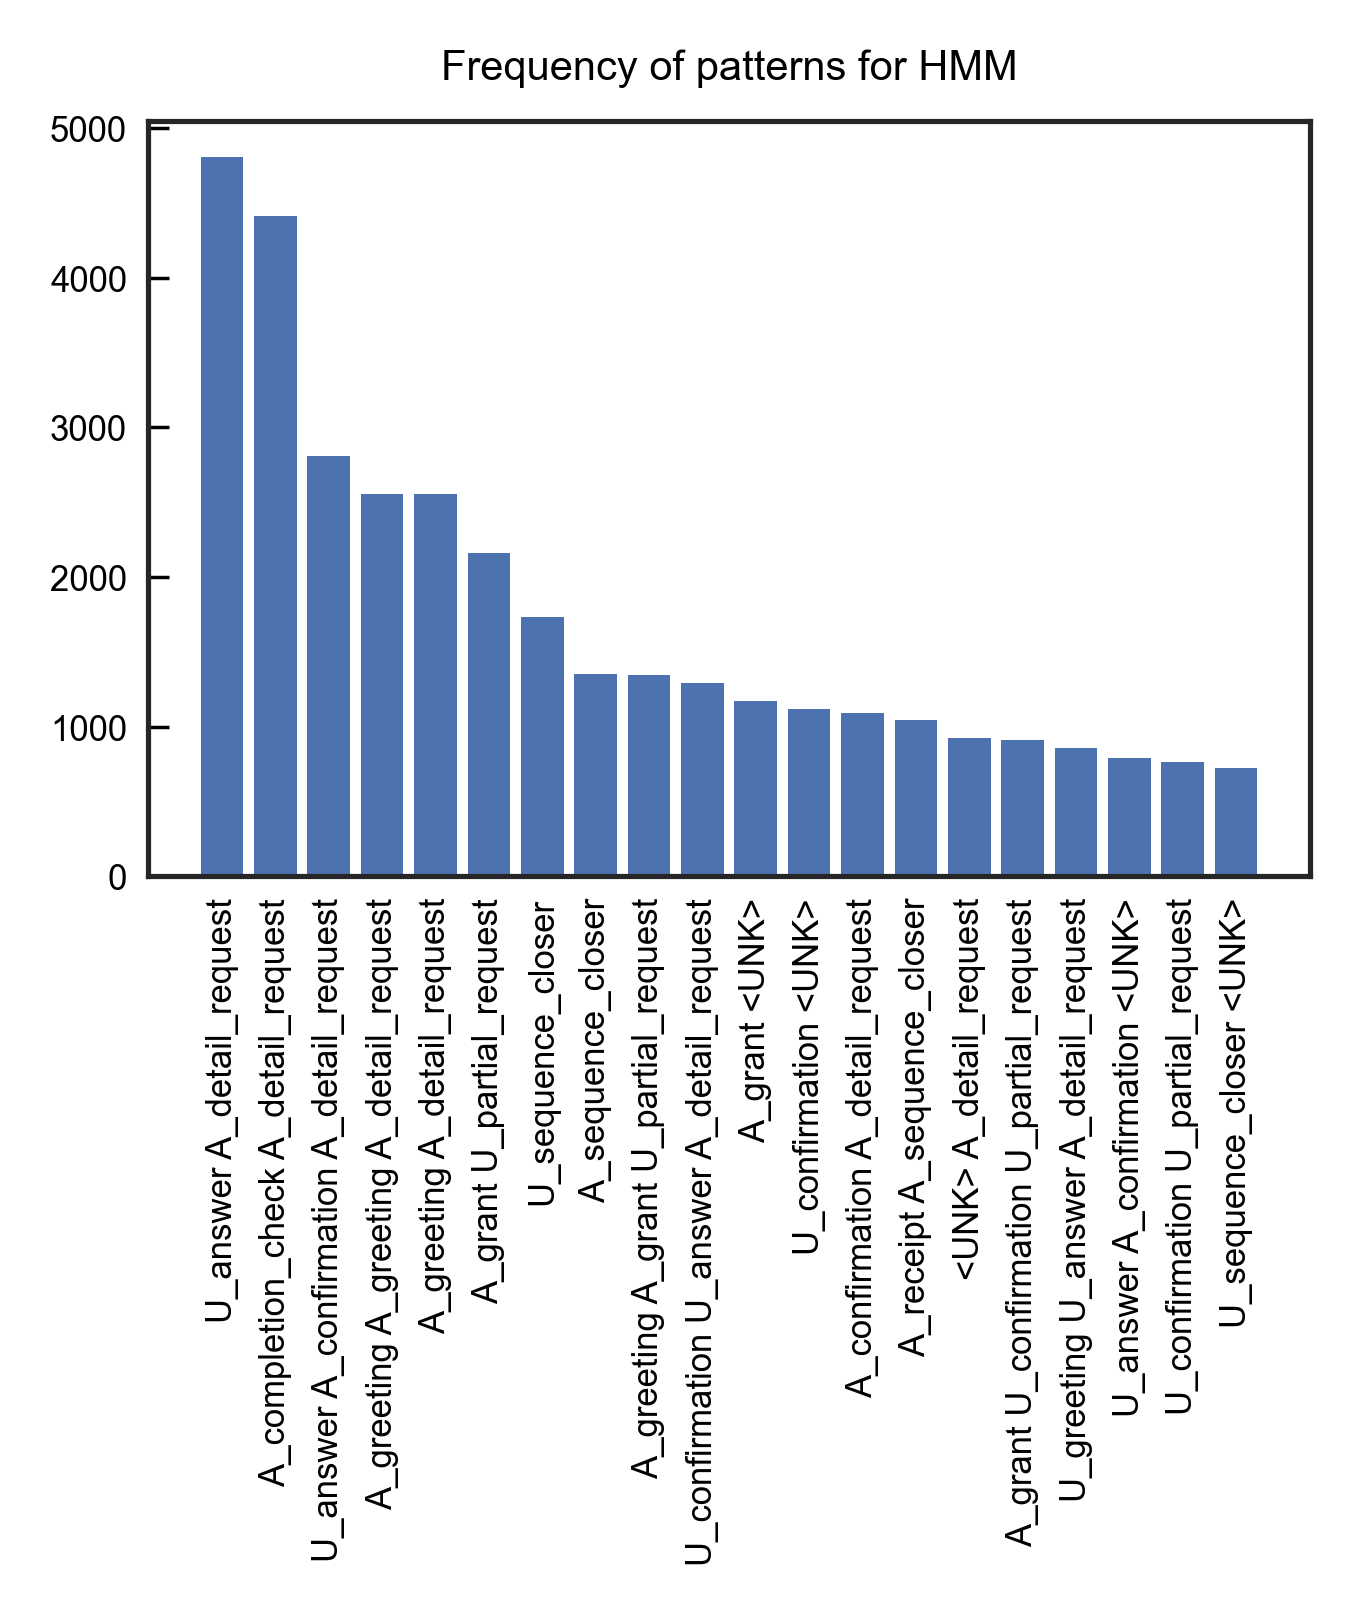

In [5]:
sliced_hmm_only = dict(itertools.islice(hmm_counts.items(), 0,20))
names = list(sliced_hmm_only.keys())

plt.bar(range(len(sliced_hmm_only)), list(sliced_hmm_only.values()), tick_label=names)
plt.xticks(rotation = 'vertical')
plt.title("Frequency of patterns for HMM")#, fontsize=17)
plt.savefig('./src/generated_files/top_freq_patterns_HMM.png',bbox_inches='tight')
plt.show()

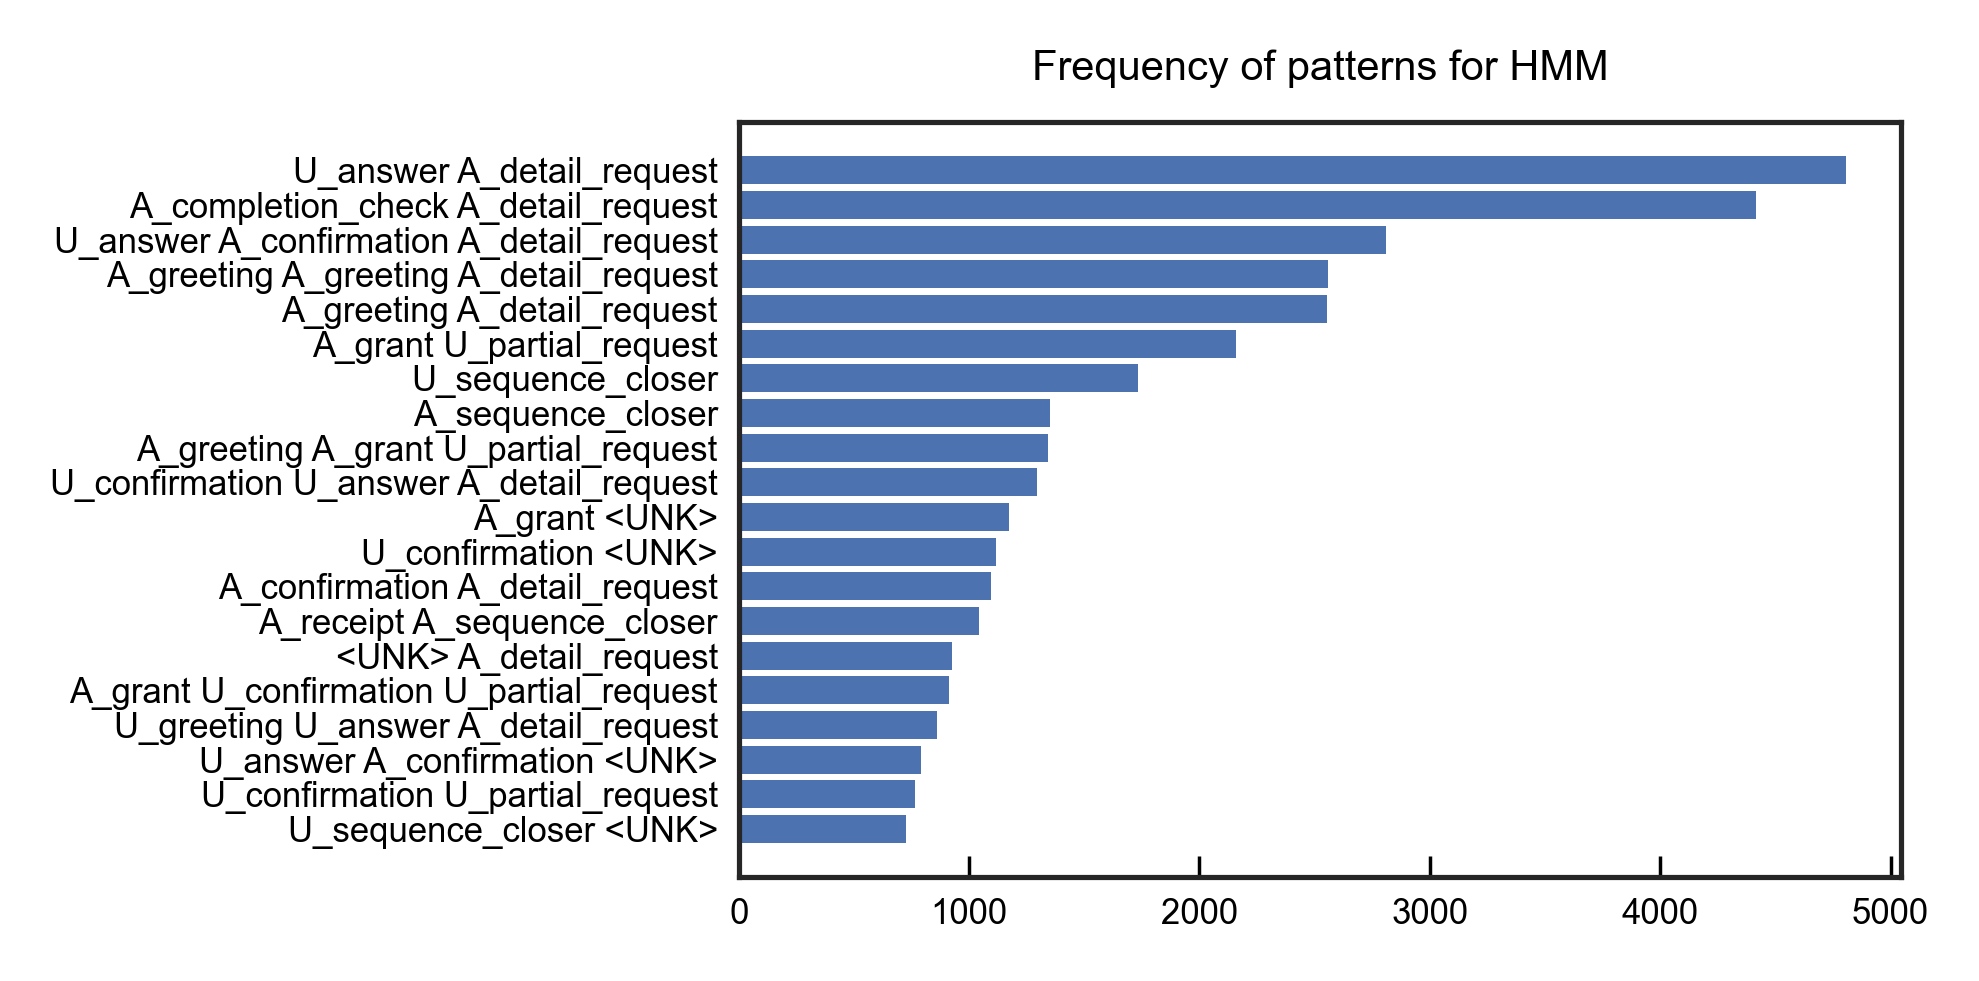

In [7]:
# import operator
# sliced_hmm_only = dict(itertools.islice(hmm_counts.items(), 0,20))
# names = list(sliced_hmm_only.keys())
# y= list(sliced_hmm_only.values()

# plt.barh(range(len(sliced_hmm_only)), list(sliced_hmm_only.values()), tick_label=names)
# plt.title("Frequency of patterns for HMM")#, fontsize=17)
# plt.savefig('./src/generated_files/top_freq_patterns_HMM.png',bbox_inches='tight')
# plt.show()
        
import operator
sliced_hmm_only = dict(itertools.islice(hmm_counts.items(), 0,20))
names = list(sliced_hmm_only.keys())
y= list(sliced_hmm_only.values())

plt.barh(range(len(sliced_hmm_only)), y[::-1], tick_label=names[::-1])
plt.title("Frequency of patterns for HMM")#, fontsize=17)
plt.savefig('./src/generated_files/top_freq_patterns_HMM.png',bbox_inches='tight')
plt.show()

In [5]:
#choose size of slice to be plotted

sliced_hmm = dict(itertools.islice(hmm_counts.items(), 0,50))
sliced_rand = dict(itertools.islice(random_baseline.items(), 0,50))
sliced_prob = dict(itertools.islice(prob_baseline.items(), 0,50))

In [102]:
# sliced_hmm

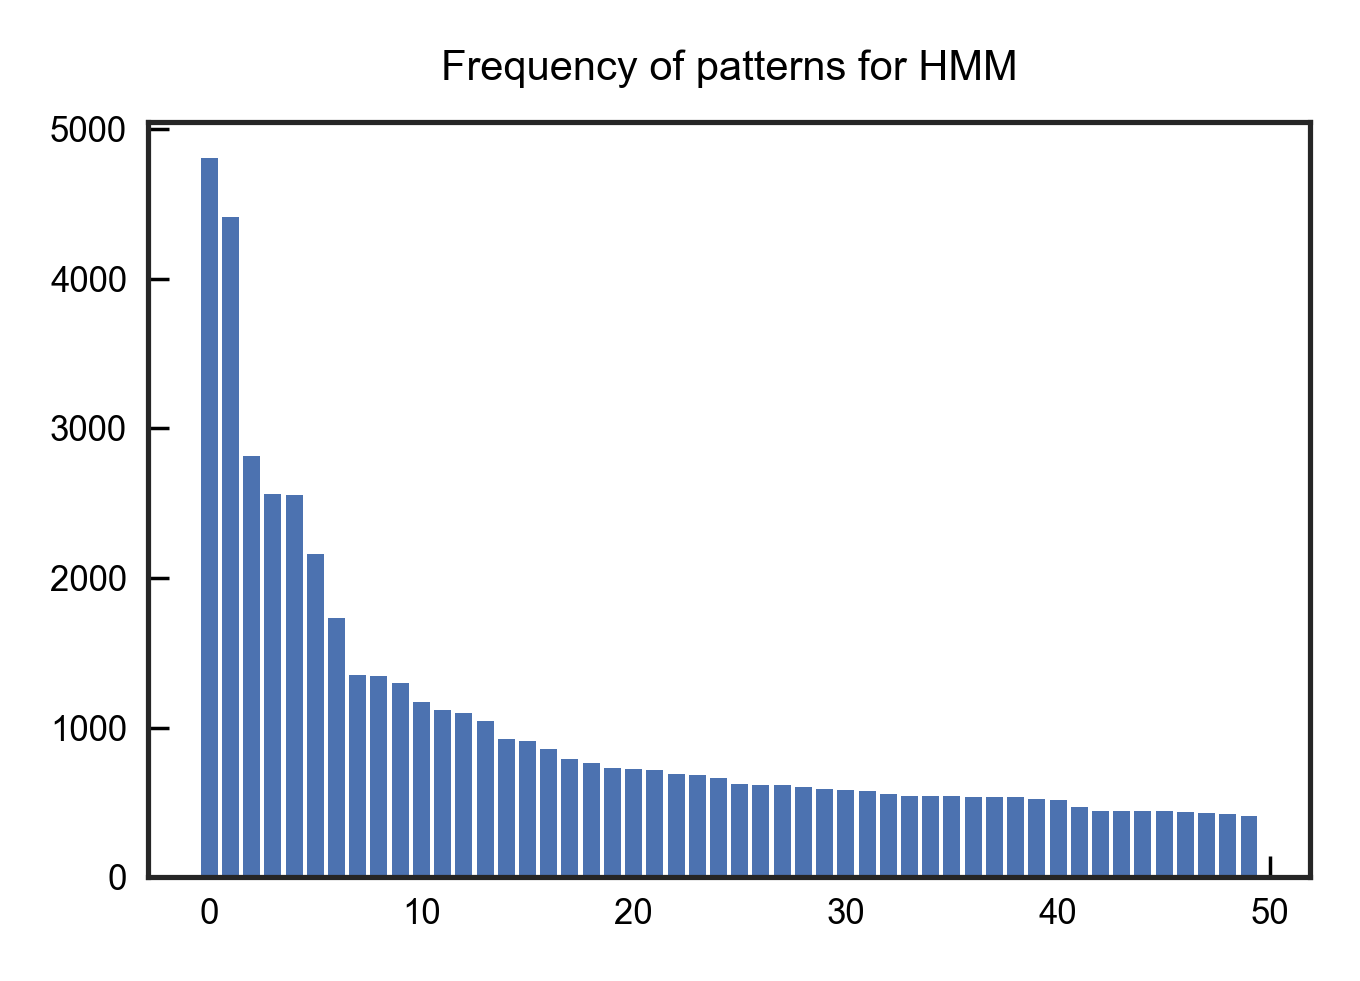

In [6]:
names = list(sliced_hmm.keys())

plt.bar(range(len(sliced_hmm)), list(sliced_hmm.values())) #, tick_label=names)
plt.title("Frequency of patterns for HMM")#, fontsize=17)
plt.show()

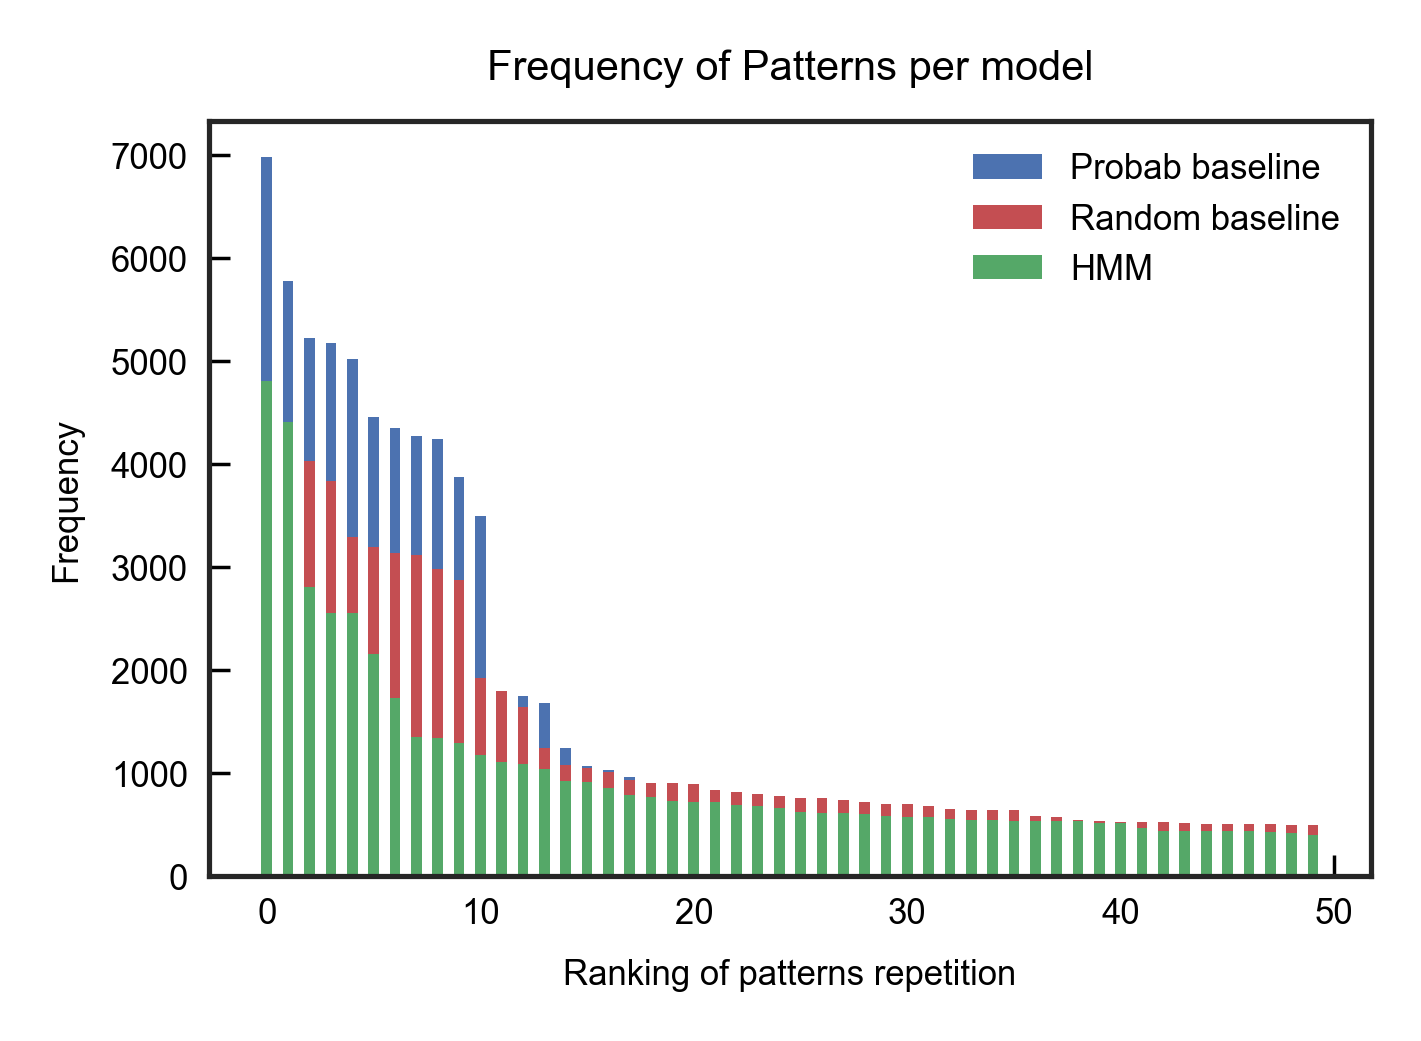

In [74]:

X = np.arange(len(sliced_prob))
ax = plt.subplot(111)
ax.bar(X, sliced_prob.values(), width=0.5)#, color='b', align='center')
ax.bar(X- 0.0001, sliced_rand.values(), width=0.5)#, color='g', align='center')
ax.bar(X- 0.0001, sliced_hmm.values(), width=0.5)#, color='r', align='center')
ax.legend(('Probab baseline', 'Random baseline', 'HMM'))
plt.xlabel("Ranking of patterns repetition")#, fontsize=14)
plt.ylabel("Frequency")#, fontsize=14)
plt.title("Frequency of Patterns per model")#, fontsize=17)
plt.savefig('./src/generated_files/freq_of_patterns_per_model.png')
plt.show()

In [8]:
a_file = open("./src/generated_files/input_hmm.pkl", "rb")
input_hmm = pickle.load(a_file)

unigram = input_hmm.get('unigram')

len(unigram)

17289

In [9]:
a_file = open('./src/generated_files/baseline_splits_hidden_and_dfvisualization.pkl', "rb")
results_base = pickle.load(a_file)
rand_baseline_split = results_base.get('rand_baseline_split')
prob_baseline_split = results_base.get('prob_baseline_split')

In [10]:
print(len(results_base.get('rand_baseline_split')))
print(len(results_base.get('prob_baseline_split')))

17289
17289


In [11]:
def flatten(t):
    # https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-a-list-of-lists
    return [item for sublist in t for item in sublist]

### Information summary

In [12]:
flat_uni = flatten(unigram)

print('number of dialogues in dataset:')
print(len(unigram))

print('number of DAs in whole dataset:')
print(len(flat_uni) - len(unigram)*4)  #because 4 special tokens per dialog)

print('number of patterns found in HMM:')
print(len(hmm_counts))

print('sum of counts of all patterns found in HMM:')
print(sum(hmm_counts.values()))

print('sum of counts of all patterns found in prob_bas:')
print(sum(prob_baseline.values()))

print('sum of counts of all patterns found in rand_bas:')
print(sum(random_baseline.values()))

print('number of different patterns found per dict. HMM:')
print(len(hmm_counts))

print('number of different patterns found per dict. prob_bas:')
print(len(prob_baseline))

print('number of different patterns found per dict. rand_bas:')
print(len(random_baseline))

print('ratio total DA/patterns found. Avg size of each pattern')
print((len(flat_uni) - len(unigram)*4)/sum(hmm_counts.values()))

number of dialogues in dataset:
17289
number of DAs in whole dataset:
566063
number of patterns found in HMM:
25140
sum of counts of all patterns found in HMM:
153003
sum of counts of all patterns found in prob_bas:
178414
sum of counts of all patterns found in rand_bas:
189786
number of different patterns found per dict. HMM:
25140
number of different patterns found per dict. prob_bas:
35337
number of different patterns found per dict. rand_bas:
20233
ratio total DA/patterns found. Avg size of each pattern
3.699685627079208


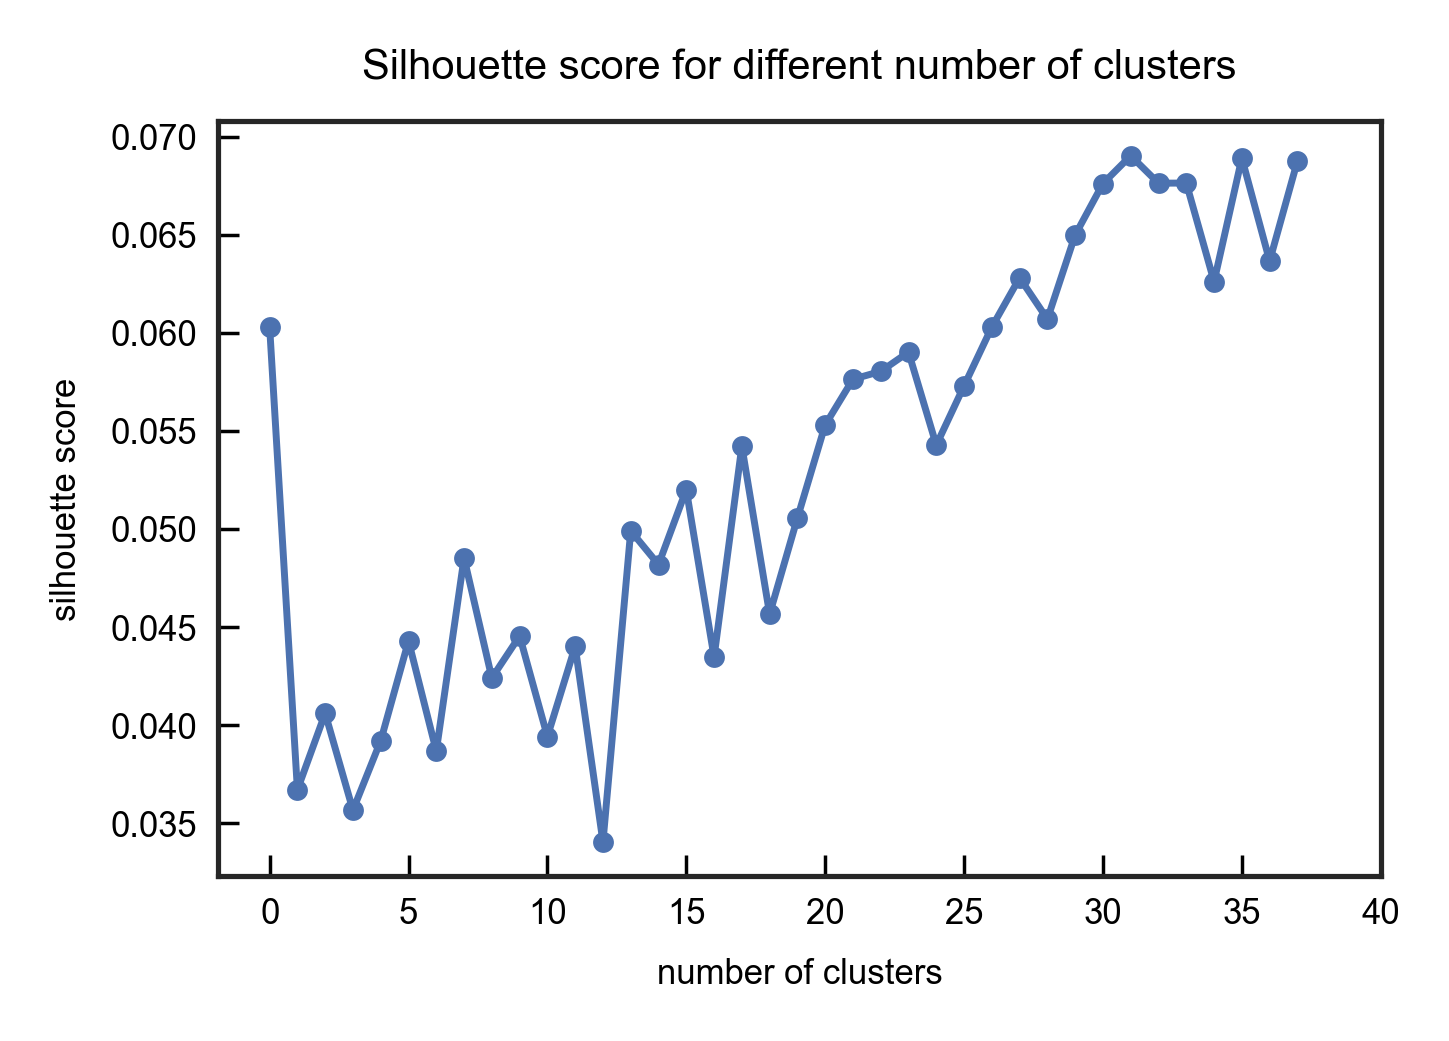

In [106]:
# plt.style.use('ggplot')
import numpy as np
import matplotlib.pyplot as plt

Silhouette062 = [0.060,0.047,0.041,0.043,0.038,0.041,0.034,0.031,0.049,0.043,0.043,0.049,0.050,0.050,0.050,0.050,0.049,0.054]
sil_40k_062param = [0.060318049322680964,0.03672105881714225,0.04061579675038122,0.03567948684765853,0.03921816150514595,0.0443039255295598,0.03868745497890188,0.048532016532171963,0.04241728225238548,0.044552279666831195,0.03943105415200722,0.044025787124240864,0.034052122132377335,0.049916506922650046,0.04819360468448127,0.05201708367667359,0.04348252353045011,0.05422760964710876,0.04567173010364702,0.05056629108552655,0.055313256430313755,0.05764197104963474,0.05804424442835543,0.05902343045002124,0.054284240946476825,0.057303791572686114,0.06030218486316354,0.06281072418972138,0.06070670416970263,0.0649940957665661,0.06761702095580122,0.06903497047429434,0.06763339241709844,0.06764186825610227,0.06261860243362932,0.06891176360184391,0.06366621823883681,0.06875838035147872]
cluster = range(len(sil_40k_062param))#np.arange(2,20,1)

plt.plot(cluster, sil_40k_062param, 'o-')
plt.title('Silhouette score for different number of clusters')
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.xticks(np.arange(0, 40 +1, 5))
plt.savefig('./src/generated_files/silhouette_per_cluster_number.png')


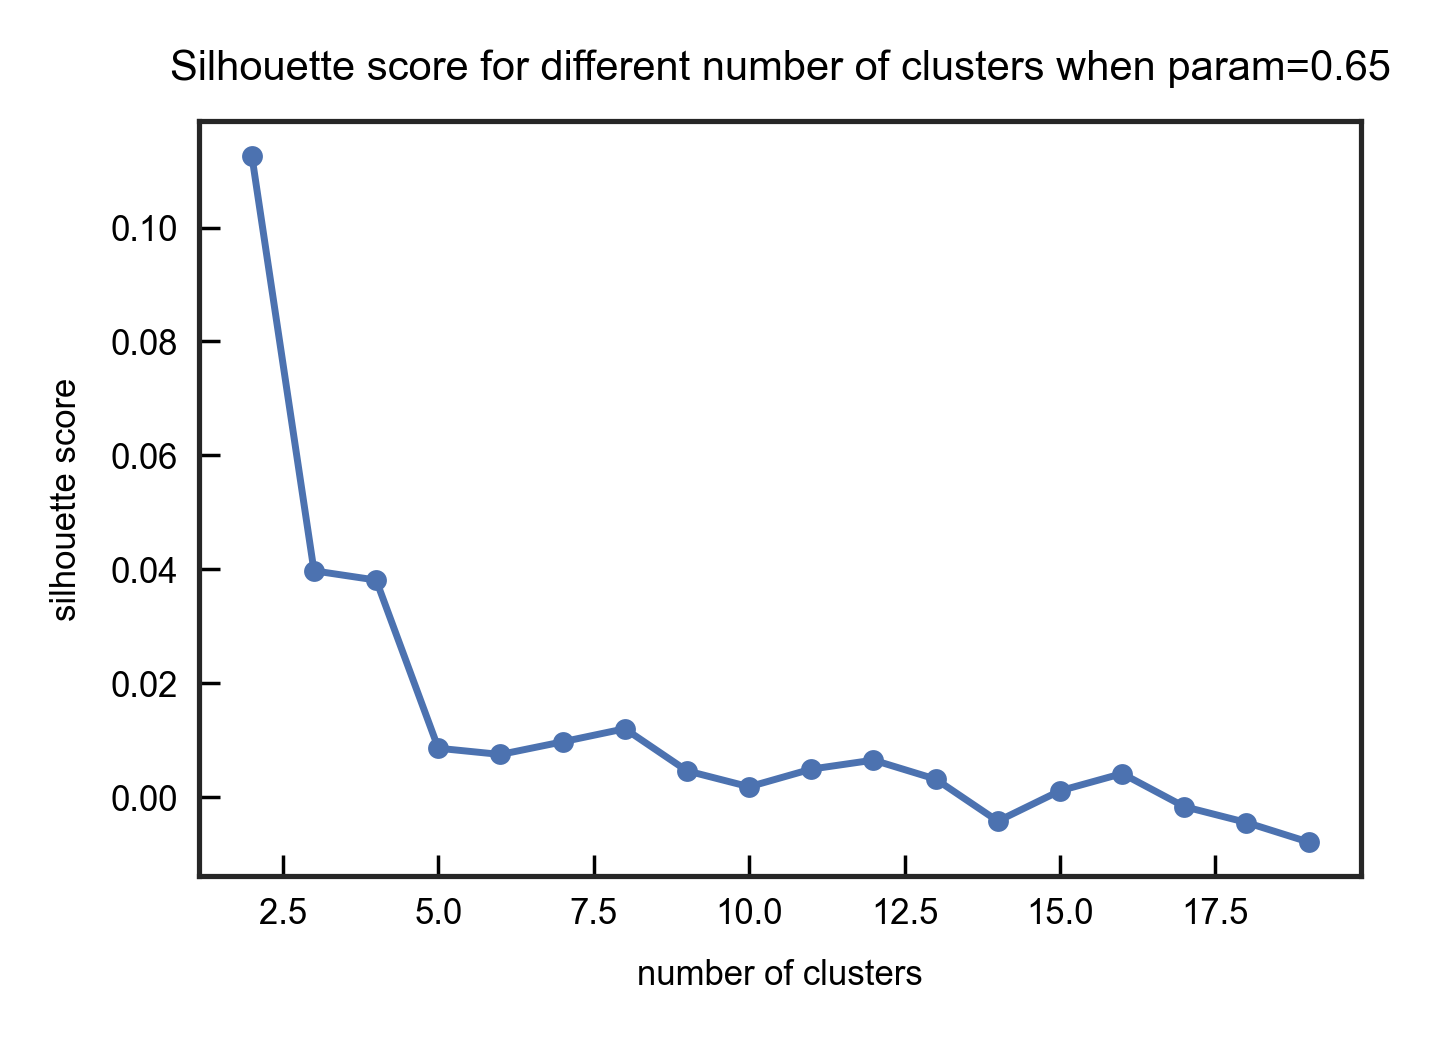

In [14]:
# plt.style.use('ggplot')
import numpy as np
import matplotlib.pyplot as plt

Silhouette065 = [0.11264079645103539, 0.039707011136652766,0.03807852357074077,0.008536104879166947,0.00743917269343705,0.009669438942283472,0.011962964385791391,0.004564775505153789, 0.0017643003938676459,0.0048714300499500965,0.006450029017638626, 0.0031097844609449523,-0.004267870925782441,0.0010620194666881573,0.004085685111775834,-0.0017282921423835817,-0.004512845969969514,-0.007950301937091172]

cluster = np.arange(2,20,1)

plt.plot(cluster, Silhouette065, 'o-')
plt.title('Silhouette score for different number of clusters when param=0.65')
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.savefig('./src/generated_files/silhouette_per_cluster_number_NEW065parameter.png')



<AxesSubplot:>

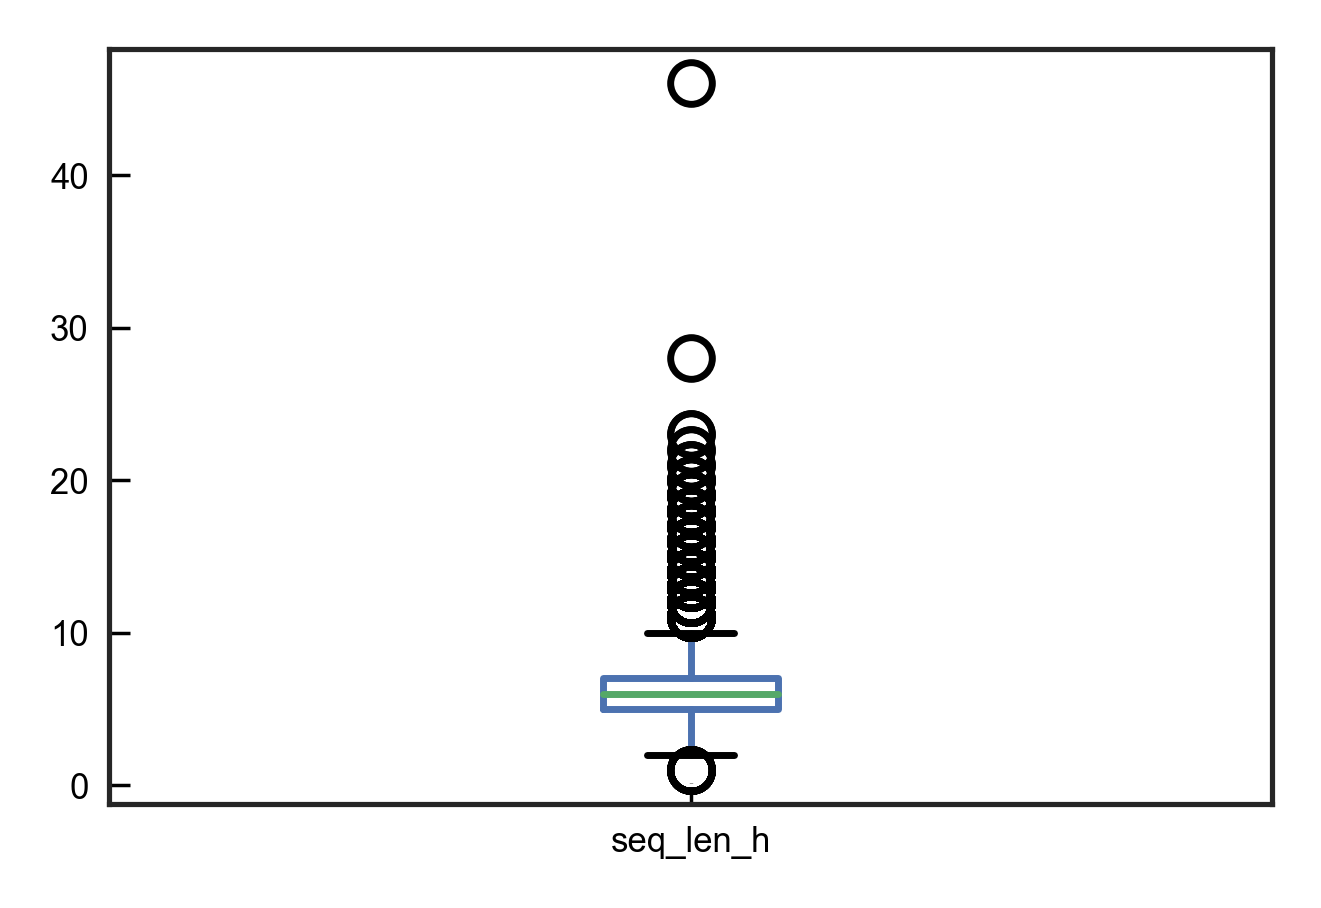

In [40]:
import pickle 
import pandas as pd


a = open('./src/generated_files/sorted_dict_HMM.pkl', 'rb')
sorted_d = pickle.load(a)

b = open('./src/generated_files/seq_to_plot_HMM.pkl', 'rb')
seq_to_plot = pickle.load(b)
    
#isso seria pra plotear todos os elementos do dict
sorted_names = list(sorted_d.keys())
sorted_values = list(sorted_d.values())
sorted_len_each_seq_h = []

for s in seq_to_plot:
#     print(len(s), s)
    sorted_len_each_seq_h.append(len(s))

df_plot_h = pd.DataFrame(list(zip(sorted_names, sorted_values, sorted_len_each_seq_h)),columns =['Name_h', 'values_h', 'seq_len_h'])

df_plot_h.drop(0, axis=0, inplace=True)

fig, ax = plt.subplots()
# df_plot.hist('seq_len', ax=ax)

    
df_plot_h.boxplot(column=['seq_len_h'])

<AxesSubplot:>

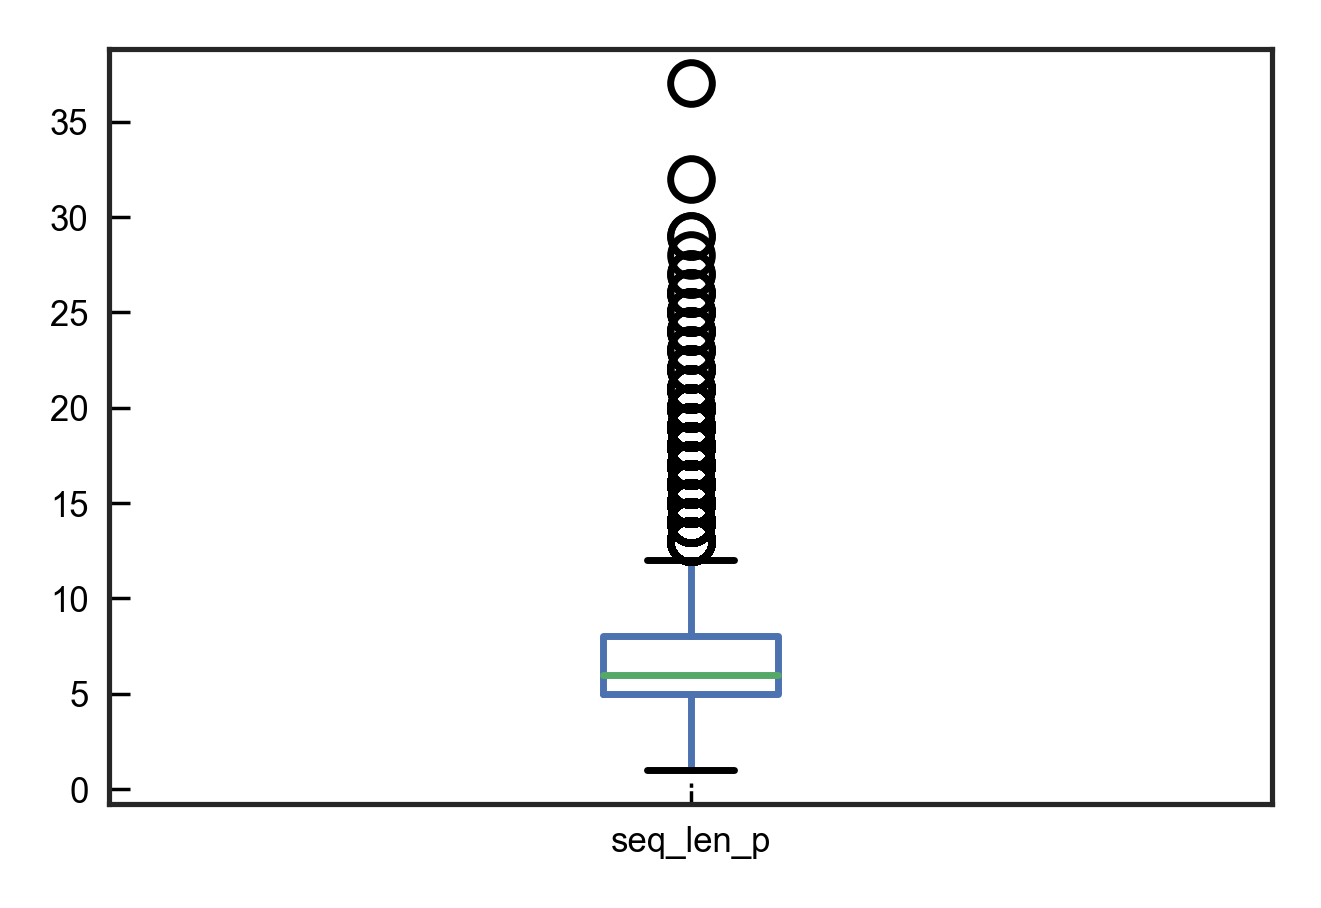

In [41]:
a = open('./src/generated_files/sorted_dict_prob_baseline.pkl', 'rb')
sorted_d = pickle.load(a)

b = open('./src/generated_files/seq_to_plot_prob_baseline.pkl', 'rb')
seq_to_plot = pickle.load(b)

#isso seria pra plotear todos os elementos do dict
sorted_names = list(sorted_d.keys())
sorted_values = list(sorted_d.values())
sorted_len_each_seq_p = []

for s in seq_to_plot:
#     print(len(s), s)
    sorted_len_each_seq_p.append(len(s))

df_plot_p = pd.DataFrame(list(zip(sorted_names, sorted_values, sorted_len_each_seq_p)),columns =['Name_p', 'values_p', 'seq_len_p'])

df_plot_p.drop(0, axis=0, inplace=True)

fig, ax = plt.subplots()
# df_plot.hist('seq_len', ax=ax)
    
df_plot_p.boxplot(column=['seq_len_p'])


<AxesSubplot:>

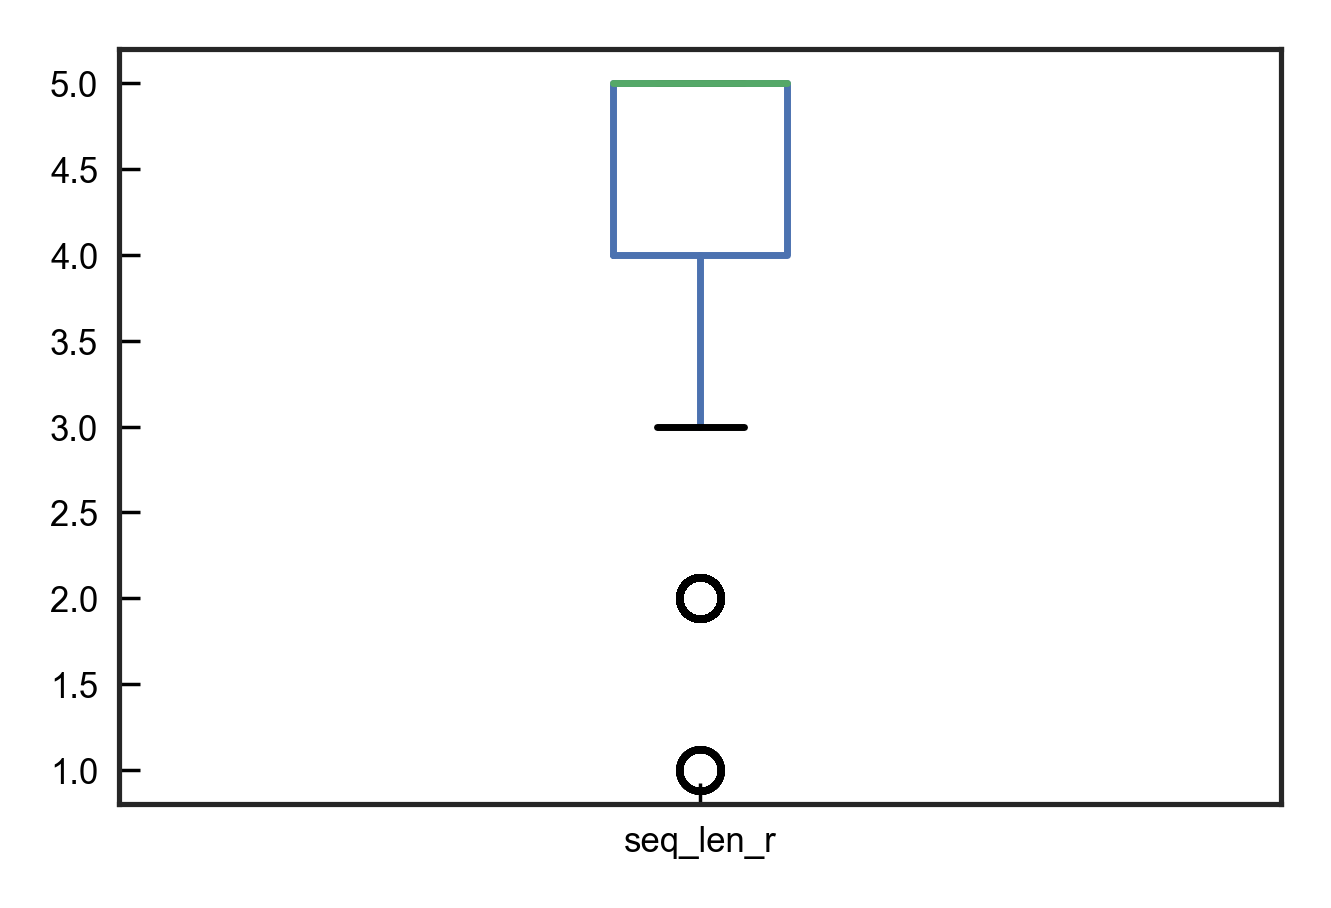

In [42]:
a = open('./src/generated_files/sorted_dict_random_baseline.pkl', 'rb')
sorted_d = pickle.load(a)

b = open('./src/generated_files/seq_to_plot_random_baseline.pkl', 'rb')
seq_to_plot = pickle.load(b)

#isso seria pra plotear todos os elementos do dict
sorted_names = list(sorted_d.keys())
sorted_values = list(sorted_d.values())
sorted_len_each_seq_r = []

for s in seq_to_plot:
#     print(len(s), s)
    sorted_len_each_seq_r.append(len(s))

df_plot_r = pd.DataFrame(list(zip(sorted_names, sorted_values, sorted_len_each_seq_r)),columns =['Name_r', 'values_r', 'seq_len_r'])

df_plot_r.drop(0, axis=0, inplace=True)

fig, ax = plt.subplots()
# df_plot.hist('seq_len', ax=ax)

    
df_plot_r.boxplot(column=['seq_len_r'])

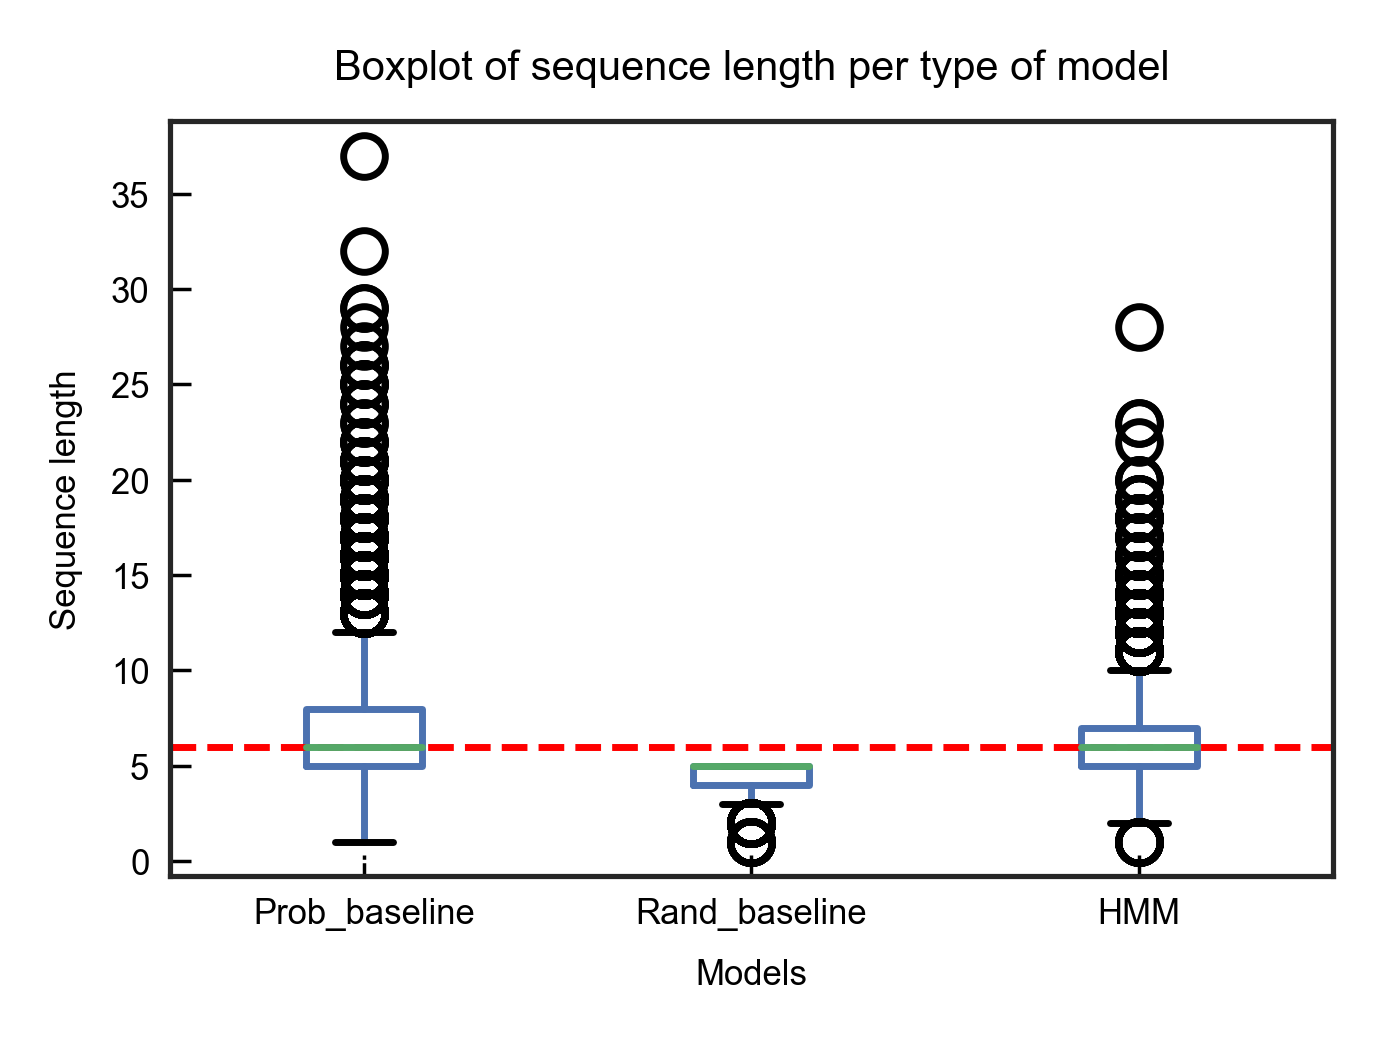

In [65]:
df_plot_all = pd.DataFrame(list(zip(sorted_len_each_seq_p, sorted_len_each_seq_r, sorted_len_each_seq_h)),columns =['Prob_baseline', 'Rand_baseline', 'HMM'])

# df_plot_r.drop(0, axis=0, inplace=True)

fig, ax = plt.subplots()
plt.title('Boxplot of sequence length per type of model')
plt.xlabel('Models')
plt.ylabel('Sequence length')
df_plot_all.boxplot(column=['Prob_baseline', 'Rand_baseline', 'HMM'])
plt.axhline(y= 6,color='red', linestyle ='dashed')
plt.savefig('./src/generated_files/boxplot_seq_len_per_model.png')

In [66]:
all_box = plt.boxplot(df_plot_all)
for key in all_box:
    print(f'{key}: {[item.get_ydata() for item in all_box[key]]}\n')

whiskers: [array([5., 1.]), array([ 8., 12.]), array([4., 3.]), array([5., 5.]), array([5., 2.]), array([ 7., 10.])]

caps: [array([1., 1.]), array([12., 12.]), array([3., 3.]), array([5., 5.]), array([2., 2.]), array([10., 10.])]

boxes: [array([5., 5., 8., 8., 5.]), array([4., 4., 5., 5., 4.]), array([5., 5., 7., 7., 5.])]

medians: [array([6., 6.]), array([5., 5.]), array([6., 6.])]

fliers: [array([19, 14, 13, 14, 14, 14, 13, 14, 16, 13, 16, 14, 16, 15, 16, 19, 13,
       13, 14, 14, 17, 13, 13, 19, 13, 16, 20, 13, 13, 14, 13, 15, 14, 17,
       18, 14, 13, 17, 15, 15, 14, 17, 13, 17, 13, 16, 13, 15, 13, 16, 13,
       14, 13, 13, 16, 16, 15, 20, 16, 13, 15, 18, 16, 15, 13, 14, 14, 13,
       17, 21, 14, 13, 16, 13, 13, 13, 22, 14, 13, 13, 13, 14, 14, 37, 13,
       13, 14, 14, 13, 13, 13, 14, 13, 13, 17, 13, 13, 16, 15, 13, 13, 26,
       13, 13, 13, 20, 14, 13, 13, 14, 14, 14, 13, 15, 15, 13, 14, 19, 17,
       15, 13, 14, 13, 15, 18, 13, 13, 15, 14, 13, 14, 18, 13, 13, 14, 13,
 